In [2]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [3]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [4]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
cwd = os.getcwd()
print(cwd)
os.listdir(os.getcwd())

C:\Users\alvij\Python\ai_primer


['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ai_primer',
 'apt.txt',
 'CNN.ipynb',
 'data',
 'DNN.ipynb',
 'Dockerfile',
 'Expand-Archive',
 'fl',
 'Flatland_project-Copy1.ipynb',
 'Flatland_project.ipynb',
 'flatland_train.data',
 'galbutDNN.ipynb',
 'housing',
 'img',
 'logs',
 'ml-latest',
 'ml-latest-small',
 'ml-latest-small.zip',
 'ml-latest.zip',
 'model.h5',
 'modelis.h5',
 'Pipfile',
 'Pipfile.lock',
 'Project.md',
 'Pvz.ipynb',
 'README.md',
 'RF.ipynb',
 'SVD.ipynb',
 'Untitled.ipynb',
 'Varia.ipynb',
 'venv',
 '_config.yml',
 '_toc.yml']

In [6]:
%load_ext tensorboard

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [8]:
from datetime import datetime

In [9]:
import gzip
import pickle

X, y = pickle.load(gzip.open('flatland_train.data', 'rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [10]:
#PVZ modelio, nukopinu nuo destytojo
NAME = "Pavadini_kaip_nori-{}".format(int(time.time()))
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [11]:
loss = model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
125/125 [==============================] - 138s 1s/step - loss: 1.2950 - accuracy: 0.4358 - val_loss: 0.9915 - val_accuracy: 0.5595
Epoch 2/5
125/125 [==============================] - 96s 764ms/step - loss: 0.7013 - accuracy: 0.6967 - val_loss: 0.4951 - val_accuracy: 0.7830
Epoch 3/5
125/125 [==============================] - 111s 889ms/step - loss: 0.3615 - accuracy: 0.8530 - val_loss: 0.2638 - val_accuracy: 0.8950
Epoch 4/5
125/125 [==============================] - 86s 692ms/step - loss: 0.1874 - accuracy: 0.9316 - val_loss: 0.1423 - val_accuracy: 0.9520
Epoch 5/5
125/125 [==============================] - 81s 646ms/step - loss: 0.0913 - accuracy: 0.9711 - val_loss: 0.0962 - val_accuracy: 0.9660


In [12]:
model.save('modelis.h5')

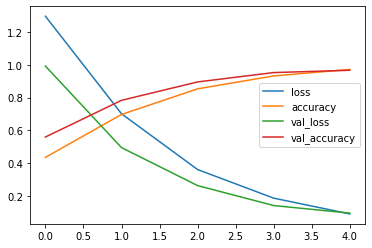

In [13]:
pd.DataFrame(loss.history).plot()

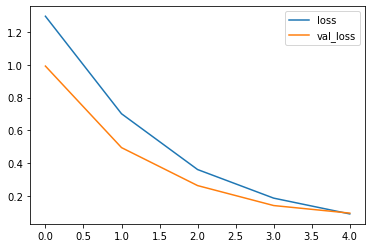

In [14]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [15]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 98.50%


In [16]:
model.save('model.h5')

In [1]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

NameError: name 'keras' is not defined